In [4]:
from skimage.io import imsave, imread, imshow
from skimage import img_as_float
from numpy import roll, dstack

In [12]:
img1 = imread('1.jpg')
img2 = imread('2.jpg')
img3 = imread('3.jpg')

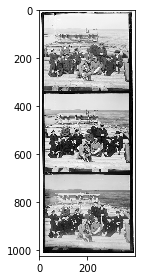

In [14]:
imshow('1.jpg')

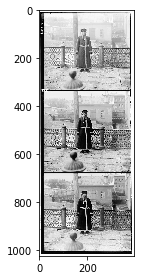

In [15]:
imshow('2.jpg')

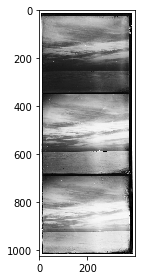

In [16]:
imshow('3.jpg')

In [20]:
def align(img):
    img_f = img_as_float(img)
    
    indent = int(img_f.shape[1] * 0.05)
    third_h = img_f.shape[0] // 3
    width = img_f.shape[1] - indent
    
    b = img_f[indent : third_h - indent, indent : width]
    g = img_f[third_h + indent : 2 * third_h - indent, indent : width]
    r = img_f[2 * third_h + indent : 3 * third_h - indent, indent : width]
    
    work_range = range(-15, 15, 1)
    max_correlation_b = max_correlation_r = 0
    for i in work_range:
        bi = roll(b, i, 0)
        ri = roll(r, i, 0)
        for j in work_range:
            bj = roll(bi, j, 1)
            rj = roll(ri, j, 1)
            correlation_b = (bj * g).sum()
            correlation_r = (rj * g).sum()
            
            if(correlation_b > max_correlation_b):
                max_correlation_b = correlation_b
                row_shift_b = i
                col_shift_b = j
                
            if(correlation_r > max_correlation_r):
                max_correlation_r = correlation_r
                row_shift_r = i
                col_shift_r = j
                
    b = roll(b, row_shift_b, 0)
    b = roll(b, col_shift_b, 1)  
    r = roll(r, row_shift_r, 0)
    r = roll(r, col_shift_r, 1)
    
    result = dstack((r, g, b))
    return result